In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
d = np.array([0, 1, 1, 0])

In [15]:
print(X)
print(X.shape)

[[0 0 1 1]
 [0 1 0 1]]
(2, 4)


In [7]:
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1
epochs = 180000

In [8]:
w1 = np.random.rand(hidden_size, input_size) * 2 - 1
b1 = np.random.rand(hidden_size, 1) * 2 - 1
w2 = np.random.rand(output_size, hidden_size) * 2 - 1
b2 = np.random.rand(output_size, 1) * 2 - 1
print("w1", w1)
print("b1", b1)
print("w2", w2)
print("b", b2)

w1 [[-0.19145295 -0.21788836]
 [-0.95494149  0.14123744]]
b1 [[ 0.75730583]
 [-0.56293007]]
w2 [[-0.78423615  0.92346352]]
b [[0.71355071]]


In [9]:
error_list = []

for epoch in range(epochs):
    # forward pass
    z1 = np.dot(w1, X) + b1 # weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1)) # sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2 # weighted sum for output layer
    a2 = 1/ (1 + np.exp(-z2)) # sigmoid activation for output layer
    # error calculation
    error = d - a2 # difference between expected and actual value
    da2 = error * (a2 * (1 - a2)) # derivative for output layer
    dz2 = da2 # gradient for output layer

    # propagate error to hidden layer
    da1 = np.dot(w2.T, dz2) # gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1)) # derivative for hidden layer

    # update weights and biases
    w2 += lr * np.dot(dz2, a1.T)
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)

    w1 += lr * np.dot(dz1, X.T)
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)

    if (epoch + 1) % 10000 == 0:
        print(f"Epoch {epoch}. Average Error: {np.average(abs(error))}")
        error_list.append(np.average(abs(error)))

Epoch 9999. Average Error: 0.04569301940032285
Epoch 19999. Average Error: 0.028514195121828456
Epoch 29999. Average Error: 0.02229264311868099
Epoch 39999. Average Error: 0.01886588593270097
Epoch 49999. Average Error: 0.016628808103381135
Epoch 59999. Average Error: 0.015024675323018656
Epoch 69999. Average Error: 0.013803503883344694
Epoch 79999. Average Error: 0.01283445166988752
Epoch 89999. Average Error: 0.012041622910213459
Epoch 99999. Average Error: 0.011377608178312335
Epoch 109999. Average Error: 0.01081108367672333
Epoch 119999. Average Error: 0.010320422214326887
Epoch 129999. Average Error: 0.00989015203120368
Epoch 139999. Average Error: 0.009508876424415997
Epoch 149999. Average Error: 0.00916799204100789
Epoch 159999. Average Error: 0.00886086730809
Epoch 169999. Average Error: 0.008582297841681824
Epoch 179999. Average Error: 0.008328134912321641


In [10]:
# testing the trained network
z1 = np.dot(w1, X) + b1
a1 = 1 / (1 + np.exp(-z1))

z2 = np.dot(w2, a1) + b2
a2 = 1 / (1 + np.exp(-z2))

print(f"Final output after training: {a2}")
print(f"Ground truth: {d}")
print(f"Error after training: {error}")
print(f"Average error {np.average(abs(error)):.5f}")

Final output after training: [[0.00837554 0.99210732 0.99042491 0.00746914]]
Ground truth: [0 1 1 0]
Error after training: [[-0.00837556  0.0078927   0.00957512 -0.00746916]]
Average error 0.00833


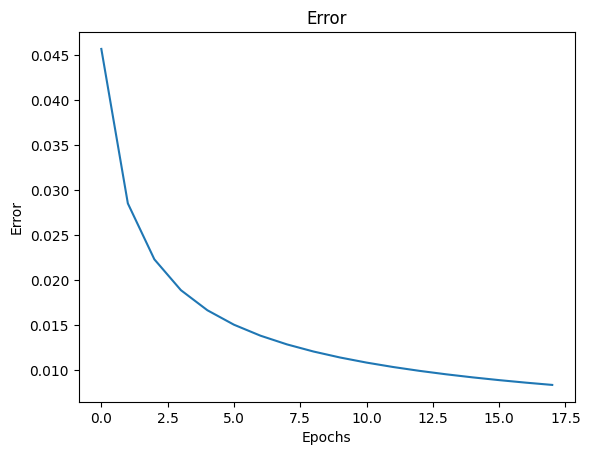

In [11]:
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Epoch: 9999, Average error: 0.25297
Epoch: 19999, Average error: 0.25227
Epoch: 29999, Average error: 0.25203
Epoch: 39999, Average error: 0.25195
Epoch: 49999, Average error: 0.25198
Epoch: 59999, Average error: 0.25210
Epoch: 69999, Average error: 0.25237
Epoch: 79999, Average error: 0.25299
Epoch: 89999, Average error: 0.25519
Epoch: 99999, Average error: 0.37549
Epoch: 109999, Average error: 0.37515
Epoch: 119999, Average error: 0.37509
Epoch: 129999, Average error: 0.37507
Epoch: 139999, Average error: 0.37505
Epoch: 149999, Average error: 0.37504
Epoch: 159999, Average error: 0.37504
Epoch: 169999, Average error: 0.37503
Epoch: 179999, Average error: 0.37503

Final output after training: [[0.24997    0.24994728 0.24994796 0.24974861]]
Ground truth [0 0 0 1]
Error after training: [[-0.24997    -0.24994728 -0.24994796  0.75025139]]
Average error: 0.37503


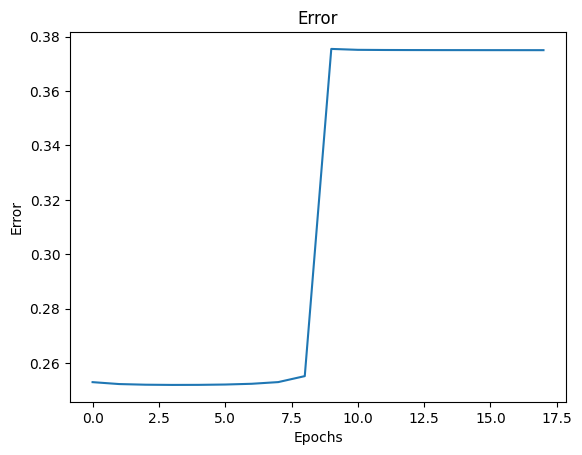

In [12]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Epoch: 9999, Average error: 0.49994
Epoch: 19999, Average error: 0.49994
Epoch: 29999, Average error: 0.49994
Epoch: 39999, Average error: 0.49993
Epoch: 49999, Average error: 0.49993
Epoch: 59999, Average error: 0.49993
Epoch: 69999, Average error: 0.49993
Epoch: 79999, Average error: 0.49992
Epoch: 89999, Average error: 0.49992
Epoch: 99999, Average error: 0.49992
Epoch: 109999, Average error: 0.49992
Epoch: 119999, Average error: 0.49991
Epoch: 129999, Average error: 0.49991
Epoch: 139999, Average error: 0.49990
Epoch: 149999, Average error: 0.49990
Epoch: 159999, Average error: 0.49990
Epoch: 169999, Average error: 0.49989
Epoch: 179999, Average error: 0.49989
Epoch: 189999, Average error: 0.49988
Epoch: 199999, Average error: 0.49987
Epoch: 209999, Average error: 0.49987
Epoch: 219999, Average error: 0.49986
Epoch: 229999, Average error: 0.49985
Epoch: 239999, Average error: 0.49985
Epoch: 249999, Average error: 0.49984
Epoch: 259999, Average error: 0.49983
Epoch: 269999, Average 

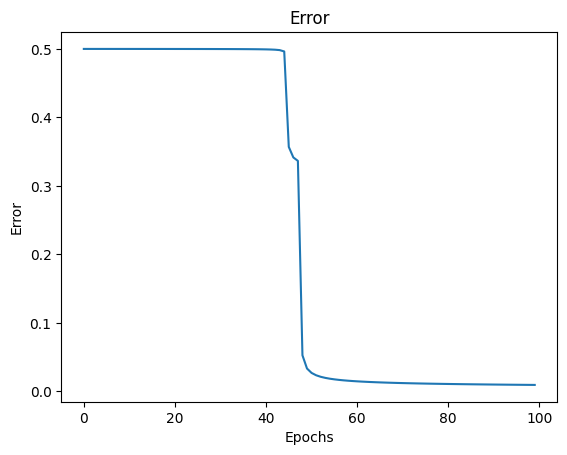

In [13]:
lr = 0.01         # Learning rate
epochs = 1000000   # Number of training epochs


# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR


# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()